by Jordan Ehrman 
## AMATH 584 Yale Faces Notebook

In [1]:
import numpy as np
from matplotlib import pyplot
import re
import os

### The function that I'm using is one I took from stack overflow
I wasn't aware of how to read in a pgm image, so I took this function from here: https://stackoverflow.com/questions/7368739/numpy-and-16-bit-pgm/7369986



In [2]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

In [3]:
image = read_pgm("CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm", byteorder='<')

# this gives us the image pixel data in 2-dimensions. We want to put it into one dimension, and so this section is where I looped through to get my image in a list

In [4]:
print(image)

[[80 80 84 ... 63 67 71]
 [81 79 78 ... 60 61 64]
 [80 79 82 ... 61 59 62]
 ...
 [12 12 19 ... 21 18 14]
 [12 12 15 ... 14 14 14]
 [12 12 12 ... 12 12 11]]


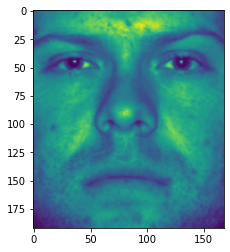

In [5]:
pyplot.imshow(image)

In [6]:
templistofpixels = []
for i in image:
    for j in i:
        templistofpixels.append(j)

## putting list into an array, making it a column vector, and learning how to append column vectors in numpy

In [7]:
bigmatrix = np.matrix([templistofpixels]).T

In [8]:
image=read_pgm("CroppedYale/yaleB01/yaleB01_P00A+000E+20.pgm", byteorder='<')

In [9]:
templistofpixels = []
for i in image:
    for j in i:
        templistofpixels.append(j)
temparrayofpixels = np.matrix([templistofpixels]).T
bigmatrix = np.append(bigmatrix,temparrayofpixels,1)

In [10]:
temparrayofpixels

matrix([[94],
        [94],
        [96],
        ...,
        [ 6],
        [ 7],
        [ 8]], dtype=uint8)

# adding column vectors to my matrix iteratively until all of my column vectors for all of my cropped faces are in one big matrix

In [11]:
for i in os.listdir('CroppedYale/'):
    for j in os.listdir('CroppedYale/' + i):
        try:
            tempimage = read_pgm('CroppedYale/' + i + '/' + j)
            templistofpixels=[]
            for k in tempimage:
                for l in k:
                    templistofpixels.append(l)
            temparrayofpixels = np.matrix([templistofpixels]).T
            bigmatrix = np.append(bigmatrix,temparrayofpixels,1)
        except:
            continue

In [12]:
print(bigmatrix.shape)
bigmatrix

(32256, 2429)


matrix([[ 80,  94,   3, ...,  12, 165, 103],
        [ 80,  94,   3, ...,  16, 165, 107],
        [ 84,  96,   3, ...,  19, 173, 111],
        ...,
        [ 12,   6, 100, ...,  10,  60,  99],
        [ 12,   7,  91, ...,  11,  62,  94],
        [ 11,   8,  83, ...,  12,  64, 109]], dtype=uint8)

# finding the average face

In [13]:
image.shape

(192, 168)

In [14]:
print(bigmatrix.shape)
summed = np.sum(bigmatrix, axis=1)
print(summed.shape)
sumreshape = np.reshape(summed,(-1,168))
print(sumreshape.shape)

(32256, 2429)
(32256, 1)
(192, 168)


In [15]:
avfacevec = (summed / 2429).astype(int)

In [16]:
avfacevec

matrix([[60],
        [62],
        [62],
        ...,
        [43],
        [41],
        [41]])

In [17]:
avface = (sumreshape / 2429).astype(int)

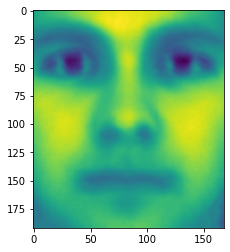

In [18]:
pyplot.imshow(avface)

In [19]:
print(bigmatrix)
print(avfacevec)
print(bigmatrix-avfacevec)
normedfacemat = bigmatrix -avfacevec

[[ 80  94   3 ...  12 165 103]
 [ 80  94   3 ...  16 165 107]
 [ 84  96   3 ...  19 173 111]
 ...
 [ 12   6 100 ...  10  60  99]
 [ 12   7  91 ...  11  62  94]
 [ 11   8  83 ...  12  64 109]]
[[60]
 [62]
 [62]
 ...
 [43]
 [41]
 [41]]
[[ 20  34 -57 ... -48 105  43]
 [ 18  32 -59 ... -46 103  45]
 [ 22  34 -59 ... -43 111  49]
 ...
 [-31 -37  57 ... -33  17  56]
 [-29 -34  50 ... -30  21  53]
 [-30 -33  42 ... -29  23  68]]


# visualizing mean-subtracted face of a picture vs the original picture. His eyes and mouth become less prominent, while the shape of his nose retains prominence. The dark shadows along the sides of his face lose some prominence, but not all. 

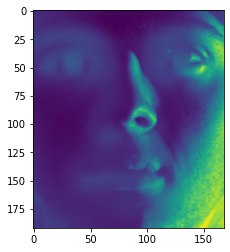

In [20]:
pyplot.imshow(np.reshape(normedfacemat.T[75],(-1,168)))

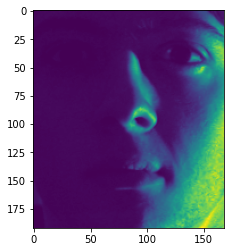

In [21]:
pyplot.imshow(np.reshape(bigmatrix.T[75],(-1,168)))

# okay, now time to do analysis. First I will do the svd

In [22]:
u, s, vt = np.linalg.svd(normedfacemat)

In [23]:
print(u.shape)
print(s.shape)
print(vt.shape)

(32256, 32256)
(2429,)
(2429, 2429)


In [24]:
s

array([3.27966346e+05, 3.18072926e+05, 1.19774020e+05, ...,
       8.08433527e+00, 1.45646903e-10, 1.93629060e-12])

# Plotting s will tell me how relatively important or useful each eigenface is in recreating the original images. The higher the value, the more useful the eigenfaces are. 

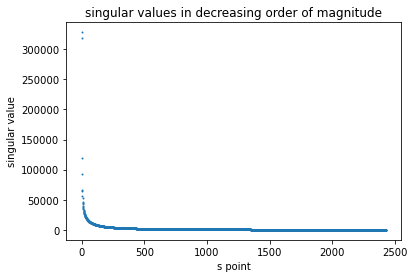

In [25]:
pyplot.title('singular values in decreasing order of magnitude')
pyplot.xlabel('s point')
pyplot.ylabel('singular value')
pyplot.plot(s, 'o', markersize = 1)

## From this, it can be seen that the first two eigenfaces are the most important, followed by the next handful. The most important eigenvectors for face image reconstruction/compression are thus stored in first 500 eigenfaces. 

# the columns of u represent the 'eigenfaces' of our set. they are arranged in order of importance. The values in s represent the weight of each eigenface -- a smaller value of s means that that column of u is less important to forming the faces. Columns of the transposed V matrix would give weights of eigenfaces with which to form the columns of the original matrix -- like a recipe for how to make any one given face from the eigenfaces. 

# now i will look at eigenfaces

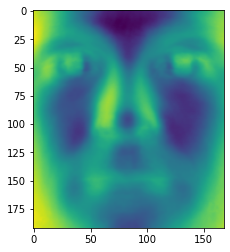

In [26]:
pyplot.imshow(np.reshape(u.T[0],(-1,168)))

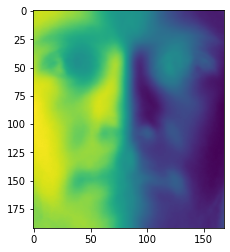

In [27]:
pyplot.imshow(np.reshape(u.T[1],(-1,168)))

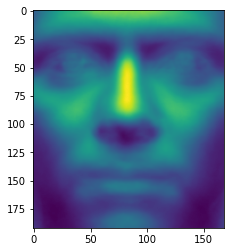

In [28]:
pyplot.imshow(np.reshape(u.T[2],(-1,168)))

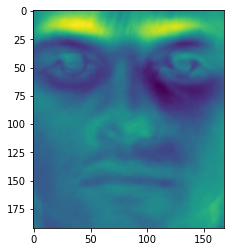

In [29]:
pyplot.imshow(np.reshape(u.T[5],(-1,168)))

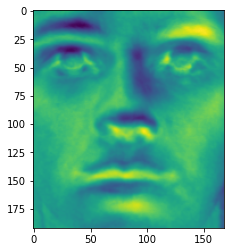

In [30]:
pyplot.imshow(np.reshape(u.T[15],(-1,168)))

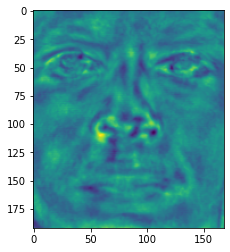

In [31]:
pyplot.imshow(np.reshape(u.T[150],(-1,168)))

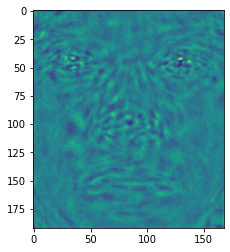

In [32]:
pyplot.imshow(np.reshape(u.T[500],(-1,168)))

# very scary. now let's try to find out if we can recreate faces well using only the first r values of the u matrix

In [33]:
testface = normedfacemat.T[300]

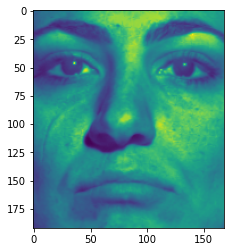

In [34]:
pyplot.imshow(np.reshape(testface,(-1,168)))

# trying to recreate with 5 eigenfaces

In [35]:
recreatedface = u[:, :5] * u[:,:5].T * testface.T

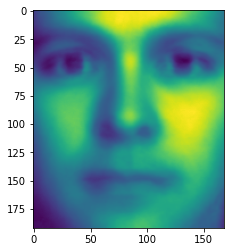

In [36]:
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# trying to recreate with 10 eigenfaces

In [37]:
recreatedface = u[:, :10] * u[:,:10].T * testface.T

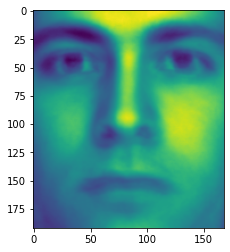

In [38]:
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# trying to recreate with 20 eigenfaces

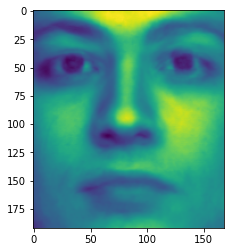

In [39]:
recreatedface = u[:, :20] * u[:,:20].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# trying to recreate with 40 eigenfaces

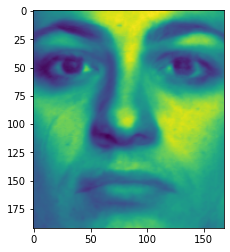

In [40]:
recreatedface = u[:, :40] * u[:,:40].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

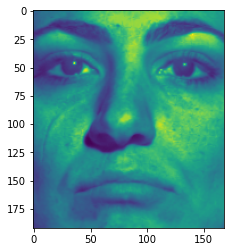

In [41]:
# original face for reference
pyplot.imshow(np.reshape(testface, (-1,168)))

# i think that looks pretty good with 40 eigenfaces actually. Let me try it again with some other testfaces. 

In [42]:
testface = normedfacemat.T[800]

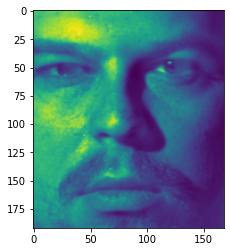

In [43]:
pyplot.imshow(np.reshape(testface, (-1,168)))

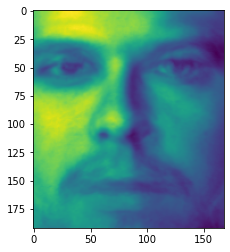

In [44]:
recreatedface = u[:, :40] * u[:,:40].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# he looks less good than the previous test face. It's possible that his face is more anomalous to the average face, and so it is less well captured by the first 40 eigenfaces. I can increase the number of eigenfaces and then try again

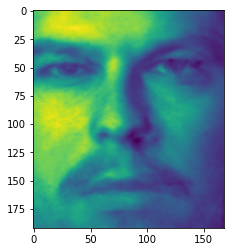

In [45]:
recreatedface = u[:, :80] * u[:,:80].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# I'll try one more with 120 eigenfaces

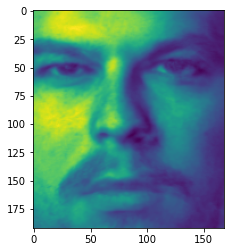

In [46]:
recreatedface = u[:, :120] * u[:,:120].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# I'll consider that a good approximation! Trying again with another test face:

In [47]:
testface = normedfacemat.T[350]

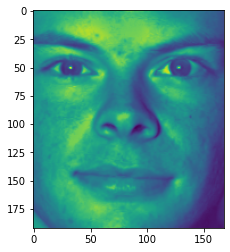

In [48]:
pyplot.imshow(np.reshape(testface, (-1,168)))

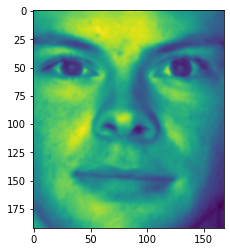

In [49]:
recreatedface = u[:, :120] * u[:,:120].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# looks good! One more face ... (this one is very dark, so I visualize his original face without mean values subtracted)

In [50]:
testface = bigmatrix.T[1738]

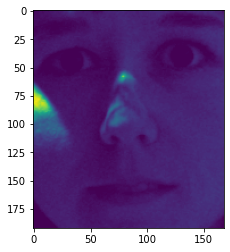

In [51]:
pyplot.imshow(np.reshape((testface), (-1,168)))

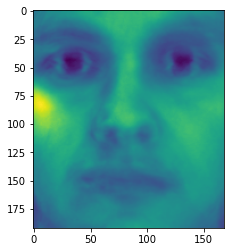

In [52]:
recreatedface = u[:, :120] * u[:,:120].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# the strange lighting and angle in this one might make it harder to recreate. I'll try with more eigenfaces

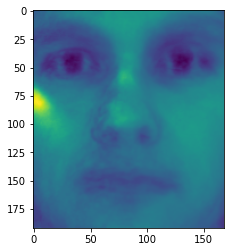

In [53]:
recreatedface = u[:, :400] * u[:,:400].T * testface.T
pyplot.imshow(np.reshape(recreatedface + avfacevec,(-1,168)))

# That at least looks more cleanly like his face. So, the rank r = 400 seems to be a good amount of eigenfaces to represent the majority of faces reasonably well, though some faces may be represented well with significantly less eigenfaces. 

# I think that's all my analysis for the cropped faces! Now moving on to the uncropped dataset.

In [54]:
from PIL import Image
image = Image.open('yalefaces/subject01.centerlight','r')

In [55]:
pix_val = list(image.getdata())

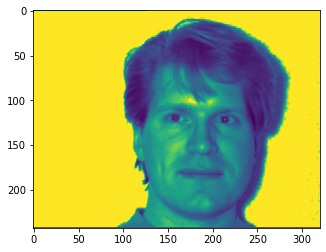

In [56]:
pyplot.imshow(np.reshape(pix_val,(-1,320)))

In [57]:
temparrayofpixels = np.matrix([pix_val]).T

In [58]:
bigmatrix = temparrayofpixels

In [59]:
bigmatrix

matrix([[130],
        [130],
        [130],
        ...,
        [ 68],
        [ 68],
        [ 68]])

In [60]:
for i in os.listdir('yalefaces/'):
    try:
        tempimage = Image.open('yalefaces/' + i, 'r')
        pix_val = list(tempimage.getdata())
        temparrayofpixels = np.matrix([pix_val]).T
        bigmatrix = np.append(bigmatrix,temparrayofpixels,1)
    except:
        continue

In [61]:
bigmatrix.shape

(77760, 166)

In [62]:
bigmatrix

matrix([[130, 130, 124, ..., 108, 130, 130],
        [130, 130, 116, ..., 116, 130, 130],
        [130, 130, 102, ..., 117, 130, 130],
        ...,
        [ 68,  68,  68, ...,  68,  68,  68],
        [ 68,  68,  68, ...,  68,  68,  68],
        [ 68,  68,  68, ...,  68,  68,  68]])

# finding the average face

In [63]:
summed = np.sum(bigmatrix, axis=1)

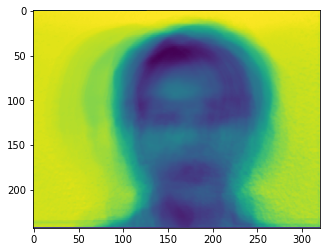

In [64]:
pyplot.imshow(np.reshape(summed,(-1,320)))

In [65]:
avfacevec = (summed / 166).astype(int)

In [66]:
normedfacemat = bigmatrix - avfacevec

# finding mean subtracted faces 

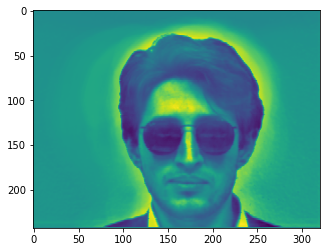

In [67]:
pyplot.imshow(np.reshape(normedfacemat.T[5],(-1,320)))

# lookin good! time to do my svd

In [68]:
u, s, vt = np.linalg.svd(normedfacemat,full_matrices=False)

# looking at eigenfaces

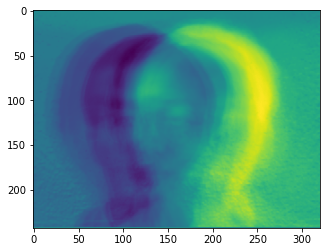

In [69]:
pyplot.imshow(np.reshape(u.T[0],(-1,320)))

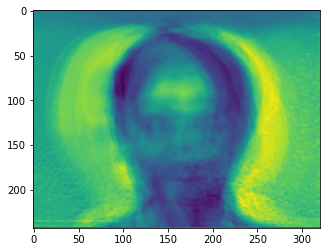

In [70]:
pyplot.imshow(np.reshape(u.T[1],(-1,320)))

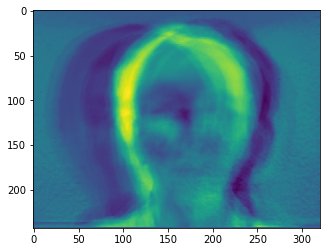

In [71]:
pyplot.imshow(np.reshape(u.T[2],(-1,320)))

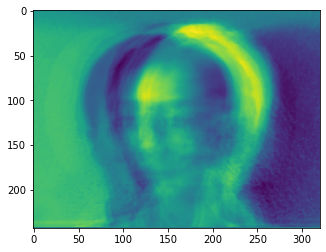

In [72]:
pyplot.imshow(np.reshape(u.T[3],(-1,320)))

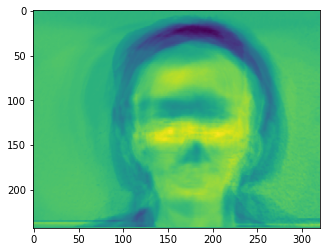

In [73]:
pyplot.imshow(np.reshape(u.T[4],(-1,320)))

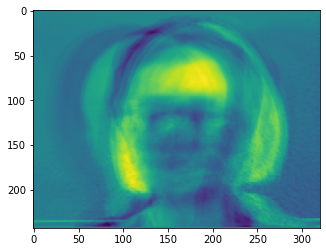

In [74]:
pyplot.imshow(np.reshape(u.T[5],(-1,320)))

# wow these are all very terrifying, now let's look at the single values

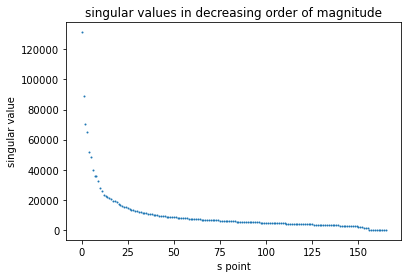

In [75]:
pyplot.title('singular values in decreasing order of magnitude')
pyplot.xlabel('s point')
pyplot.ylabel('singular value')
pyplot.plot(s, 'o', markersize = 1)

# As was expected, the highest single values for the uncropped faces have much lower magnitudes than those of the cropped faces. This is because the faces in this set are less aligned, and features that showed up in the eigenfaces of the aligned faces (like defined eyes, nose, and mouth) were not present in the eigenfaces here. Since the heads are not in the same part of each photo, each eigenface also only contributes well to the faces that are in a similar position of the photograph to it. Still, I will try to use the eigenfaces to reconstruct with. 

In [76]:
testface = normedfacemat.T[5]

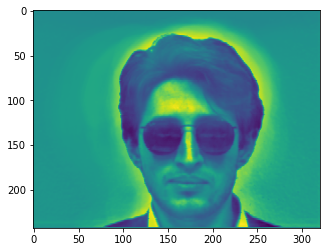

In [77]:
pyplot.imshow(np.reshape(testface,(-1,320)))

# trying with 5 eigenfaces

In [78]:
recface = np.matmul(u[:,:5], np.matmul(u[:,:5].T,testface.T))

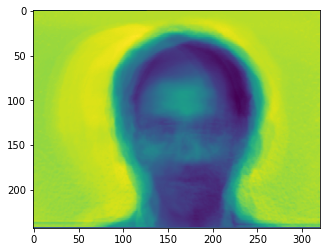

In [79]:
pyplot.imshow(np.reshape(recface + avfacevec,(-1,320)))

# trying with 10 eigenfaces 

In [80]:
recface = np.matmul(u[:,:10], np.matmul(u[:,:10].T,testface.T))

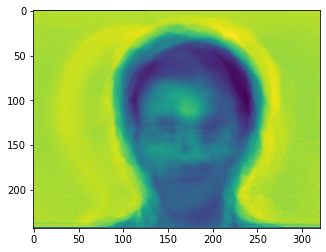

In [81]:
pyplot.imshow(np.reshape(recface + avfacevec,(-1,320)))

# trying with 50 eigenfaces

In [82]:
recface = np.matmul(u[:,:50], np.matmul(u[:,:50].T,testface.T))

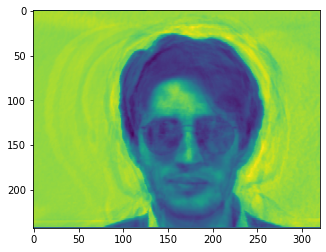

In [83]:
pyplot.imshow(np.reshape(recface + avfacevec,(-1,320)))

# trying with another face 

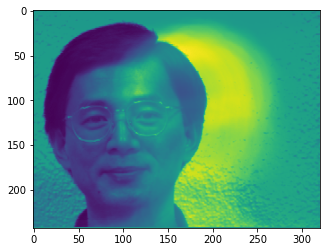

In [84]:
testface = normedfacemat.T[44]
pyplot.imshow(np.reshape(testface,(-1,320)))

# compression with 50 eigenfaces

In [85]:
recface = np.matmul(u[:,:50], np.matmul(u[:,:50].T,testface.T))

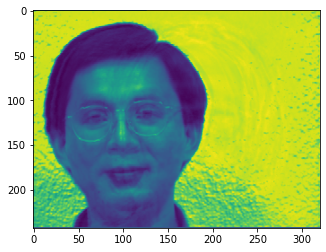

In [89]:
pyplot.imshow(np.reshape(recface + avfacevec,(-1,320)))

# These generally, actually, look pretty good. I will try some with weird facial expressions to confirm that 50 is enough eigenfaces for this set, though I already have suspicions as to why this set may seem easier to recreate with, despite the lack of alignment.

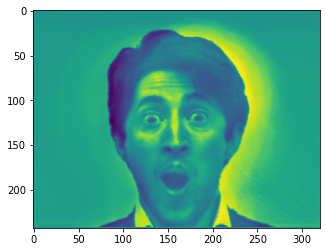

In [93]:
testface = normedfacemat.T[22]
pyplot.imshow(np.reshape(testface,(-1,320)))testface = normedfacemat.T[22]
pyplot.imshow(np.reshape(testface,(-1,320)))

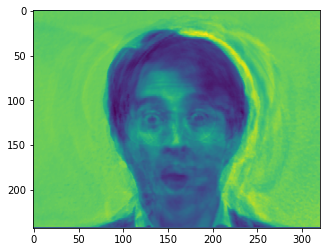

In [94]:
recface = np.matmul(u[:,:50], np.matmul(u[:,:50].T,testface.T))
pyplot.imshow(np.reshape(recface + avfacevec,(-1,320)))

# that still looks pretty good, all things considered! Even though the eigenfaces for this group are less strong in terms of their singular values than the other set, none of the photos in this set are as difficult to emulate as the most difficult photos to emulate in the cropped set. These photos all have similar lighting conditions, and are generally better lit, with people who still generally face forward. The ability to recreate an image from eigenfaces therefore seems easier for this set, as no faces in this set are as poorly lit as the worst lit photos from the first set.  Faces can be recreated reasonably well for even strange facial expressions with a rank of r=50, or from the first 50 most important eigenfaces from the svd. 

In [96]:
print(u)

[[-3.66272686e-04  1.07473716e-03  1.08053776e-04 ...  1.44261631e-03
  -1.03270086e-03  9.45754799e-01]
 [-5.92203998e-04  1.24881304e-03  1.04569568e-04 ...  4.19829883e-02
  -3.41011914e-02 -6.75873018e-02]
 [-6.97014042e-04  1.28961831e-03  1.15805127e-04 ... -4.44101176e-02
  -2.92933950e-02  1.19276151e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
